# Load libs

In [44]:
import pandas as pd
import numpy as np

from typing import List, Set

from matplotlib import pyplot as plt
import itertools

from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

from data_cleaning import DataCleaner
from plotly_utils import build_2d_figure, build_3d_figure

# Load dataset

In [2]:
df = pd.read_csv("dataset_huge.csv", usecols=["id", "title", "search_query", "description"]).dropna()

# Data analysis
## Query distribution

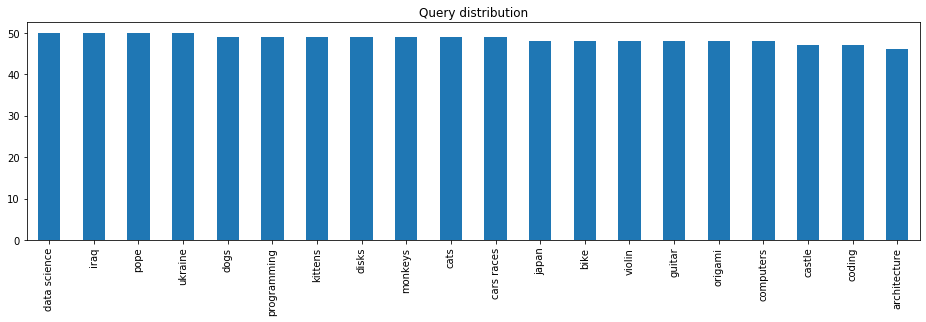

In [3]:
df["search_query"].value_counts().plot(kind="bar", title='Query distribution', figsize=(16, 4))

## Words number in description distribution

Text(0, 0.5, 'Descriptions number with words amount')

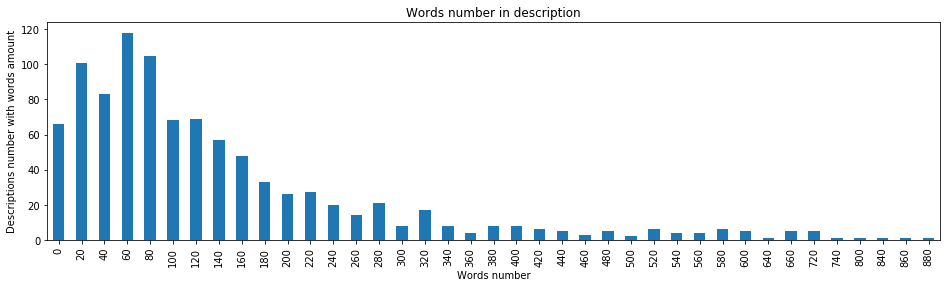

In [4]:
df["description"].apply(
    lambda words: int(len(words.split()) / 20) * 20
).value_counts().sort_index().plot(kind="bar", figsize=(16, 4))

plt.title('Words number in description')
plt.xlabel('Words number')
plt.ylabel('Descriptions number with words amount')

## Dictionary analysis
### Raw dictionary

In [5]:
def build_dictionary(data: pd.Series) -> Set[str]:
    return np.unique(pd.Series(itertools.chain.from_iterable(data.str.split())))

In [6]:
print("Raw dictionary size: {} unique words.".format(len(build_dictionary(df["description"]))))

Raw dictionary size: 32603 unique words.


### Cleaning descriptions

In [9]:
cleaner = DataCleaner()
df["cleaned_description"] = df["description"].apply(cleaner.clean_description)

[nltk_data] Downloading package wordnet to /home/fisz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
print("Cleaned dictionary size: {} unique words.".format(len(build_dictionary(df["cleaned_description"]))))

Cleaned dictionary size: 16269 unique words.


# Embedding
## BOW

In [75]:
# embeddings = CountVectorizer(ngram_range=(1, 3)).fit_transform(df["cleaned_description"])
# embeddings = TfidfVectorizer(ngram_range=(1, 3)).fit_transform(df["cleaned_description"])
embeddings = HashingVectorizer(ngram_range=(1, 3), n_features=100).fit_transform(df["cleaned_description"])

truncated = TruncatedSVD(n_components=3).fit_transform(embeddings)
# truncated = PCA(n_components=3).fit_transform(embeddings.todense())
# truncated = KernelPCA(n_components=3).fit_transform(embeddings.todense())

encoded_labels = LabelEncoder().fit_transform(df["search_query"])

In [76]:
fig = build_2d_figure(df, encoded_labels, truncated)
fig.show()